In [2]:
# 1️⃣ Import & Preprocess Dataset
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#2️⃣ Split Data into Train & Test Sets
from sklearn.model_selection import train_test_split

X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 3️⃣ Fit Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# 4️⃣ Evaluate Model (MAE, MSE, RMSE, R²)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 1265275.6699454372
MSE: 2750040479309.0513
RMSE: 1658324.6001036863
R² Score: 0.45592991188724474


In [8]:
# 5️⃣ Interpret Model Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 59485.379208716564
Coefficients: [3.45466570e+02 3.60197650e+05 1.42231966e+06]


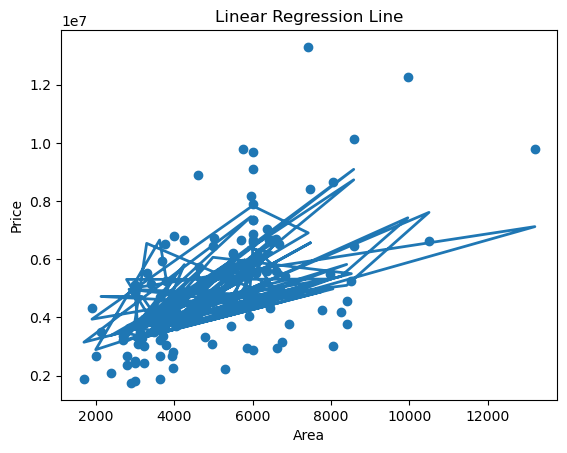

In [9]:
# 6️⃣ Plot Regression Line (Simple Regression)
import matplotlib.pyplot as plt

plt.scatter(X_test['area'], y_test)
plt.plot(X_test['area'], y_pred, linewidth=2)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression Line")
plt.show()